In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
path = "C:\\Users\\Asus\\Downloads\\wine.csv"

In [58]:
data = pd.read_csv(path)

In [59]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [60]:
data['quality'] = pd.to_numeric(data['quality'], errors='coerce')

In [61]:
X = data.drop('quality', axis=1).values  
y = data['quality'].values

In [62]:
y = (y > 5).astype(int)  

In [88]:
indices = np.random.permutation(len(X))  
X = X[indices]  
y= y[indices] 

In [89]:
split_ratio = 0.8  
split_index = int(len(X) * split_ratio)

In [90]:
X_train = X[:split_index]  
y_train = y[:split_index]  
X_test = X[split_index:]  
y_test = y[split_index:] 

In [109]:
def hypothesis(X, weights):
    return 1 / (1 + np.exp(-1 * np.dot(X, weights)))

In [110]:
#def sigma(z):  
 #   return 1 / (1 + np.exp(-z))

In [111]:
#def predict(X, theta):  
 #   return sigma(X.dot(theta)) 

In [112]:
def gradient(X, y, theta):  
    m = len(y)  
    h = hypothesis(X, theta)  
    epsilon = 1e-5  
    cost = -1/m * (y.T.dot(np.log(h + epsilon)) + (1 - y).T.dot(np.log(1 - h + epsilon)))  
    return cost

In [113]:
def gradient_descent(X, y, theta, learning_rate, iterations):  
    m = len(y)  
    cost_history = []  

    for _ in range(iterations):  
        h = predict(X, theta)  
        grad = np.dot(X.T, (h - y)) / m  
        theta -= learning_rate * grad  
        cost = gradient(X, y, theta)  
        cost_history.append(cost)  
    
    return theta, cost_history

In [114]:
m, n = X_train.shape  
X_train = np.hstack((np.ones((m, 1)), X_train))    
theta = np.zeros(n + 1)

In [115]:
learning_rate = 0.01  
iterations = 1000  
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)  

In [116]:
x_test = X_test.shape[0]  
X_test = np.hstack((np.ones((x_test, 1)), X_test))

In [117]:
cost_history

[np.float64(0.0029123697918253797),
 np.float64(0.002881541096605172),
 np.float64(0.002851367133628485),
 np.float64(0.0028218271315289594),
 np.float64(0.0027929011913953306),
 np.float64(0.002764570241339513),
 np.float64(0.002736815993878882),
 np.float64(0.002709620905931147),
 np.float64(0.002682968141236649),
 np.float64(0.002656841535037734),
 np.float64(0.0026312255608584986),
 np.float64(0.0026061052992403565),
 np.float64(0.0025814664083002865),
 np.float64(0.002557295095988856),
 np.float64(0.0025335780939344226),
 np.float64(0.0025103026327686637),
 np.float64(0.002487456418836309),
 np.float64(0.0024650276121992365),
 np.float64(0.002443004805851655),
 np.float64(0.002421377006069246),
 np.float64(0.00240013361382063),
 np.float64(0.0023792644071746532),
 np.float64(0.002358759524641781),
 np.float64(0.0023386094493921573),
 np.float64(0.0023188049942969055),
 np.float64(0.0022993372877429656),
 np.float64(0.002280197760175114),
 np.float64(0.0022613781313220523),
 np.flo

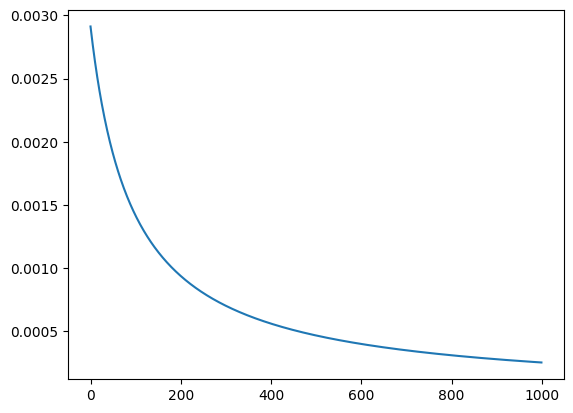

In [118]:
plt.plot(cost_history)
plt.show()